# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import normaltest

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn import metrics

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

# Lendo os Dados

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# EDA

### Valores Nulos

In [4]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

### Distribuição das Variáveis

##### Valence

In [5]:
df['valence'].describe()

count    170653.000000
mean          0.528587
std           0.263171
min           0.000000
25%           0.317000
50%           0.540000
75%           0.747000
max           1.000000
Name: valence, dtype: float64

<AxesSubplot:title={'center':'Valence'}>

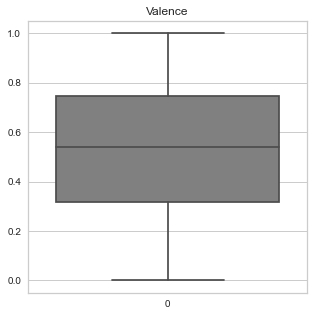

In [6]:
plt.figure(figsize=(5,5))
plt.title('Valence')
sns.boxplot(data=df['valence'], orient='v', color='gray')

<AxesSubplot:title={'center':'Valence'}, xlabel='valence', ylabel='Density'>

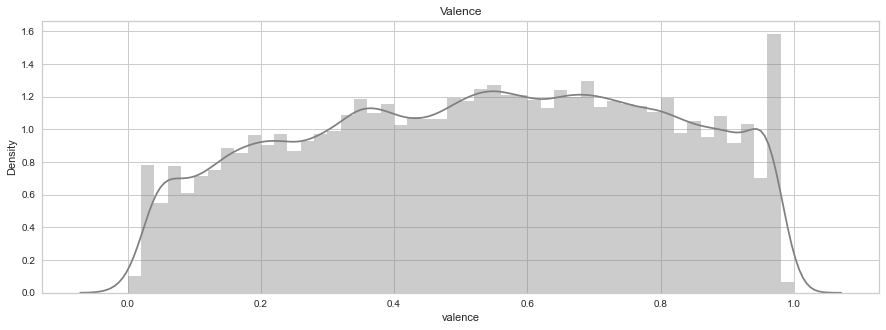

In [7]:
plt.figure(figsize=(15,5))
plt.title('Valence')
sns.distplot(df['valence'], color='gray')

##### Year

<AxesSubplot:title={'center':'Music by Year'}, xlabel='year', ylabel='count'>

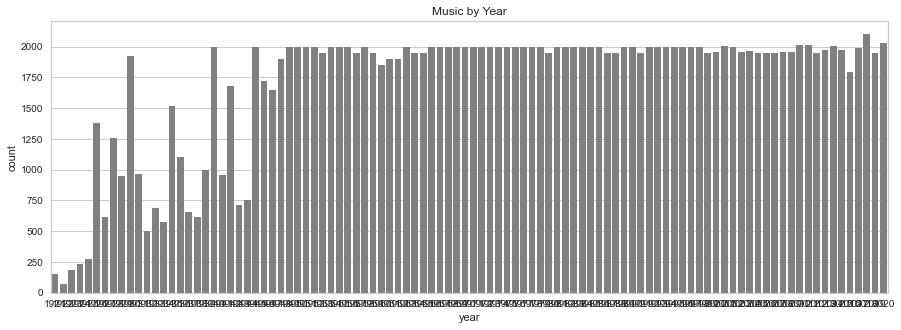

In [8]:
plt.figure(figsize=(15,5))
plt.title('Music by Year')
sns.countplot(df['year'], color='gray')

Muitas músicas e anos, não?

##### Acousticness

<AxesSubplot:title={'center':'Valence'}, xlabel='acousticness', ylabel='Density'>

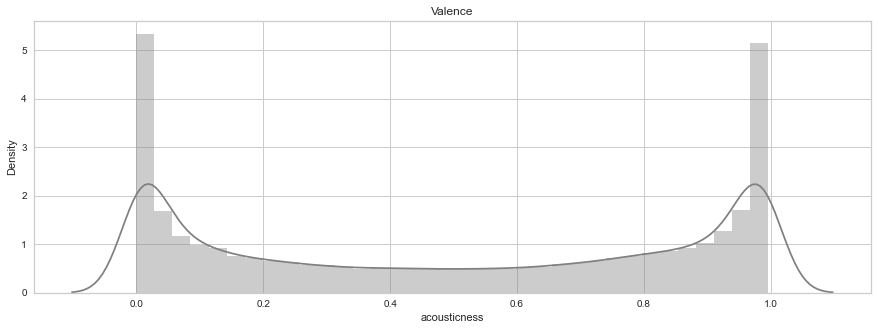

In [9]:
plt.figure(figsize=(15,5))
plt.title('Valence')
sns.distplot(df['acousticness'], color='gray')

##### Artists

In [10]:
df['artists'] = df['artists'].str.replace('\[', '', regex=True)
df['artists'] = df['artists'].str.replace('\]', '', regex=True)
df['artists'] = df['artists'].str.split(',')

In [11]:
df['artists']

0         ['Sergei Rachmaninoff',  'James Levine',  'Ber...
1                                            ['Dennis Day']
2         ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3                                          ['Frank Parker']
4                                            ['Phil Regan']
                                ...                        
170648    ['Anuel AA',  'Daddy Yankee',  'KAROL G',  'Oz...
170649                                         ['Ashnikko']
170650                                          ['MAMAMOO']
170651                                           ['Eminem']
170652                               ['KEVVO',  'J Balvin']
Name: artists, Length: 170653, dtype: object

In [12]:
df[['artists']]

,artists
0,"['Sergei Rachmaninoff', 'James Levine', 'Ber..."
1,['Dennis Day']
2,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...
3,['Frank Parker']
4,['Phil Regan']
...,...
170648,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Oz..."
170649,['Ashnikko']
170650,['MAMAMOO']
170651,['Eminem']


In [13]:
df_new = df[['artists']].explode('artists')
df_new

,artists
0,'Sergei Rachmaninoff'
0,'James Levine'
0,'Berliner Philharmoniker'
1,'Dennis Day'
2,'KHP Kridhamardawa Karaton Ngayogyakarta Hadin...
...,...
170649,'Ashnikko'
170650,'MAMAMOO'
170651,'Eminem'
170652,'KEVVO'


In [14]:
artists_list = df_new['artists'].unique().tolist()

In [15]:
df_new['artists'] = df_new['artists'].str.replace('$', 's')

In [16]:
df_artists = pd.DataFrame(df_new['artists'].value_counts())
df_artists.reset_index(inplace=True)
df_artists

,index,artists
0,'Francisco Canaro',2227
1,'Эрнест Хемингуэй',1211
2,'Эрих Мария Ремарк',1068
3,'Frédéric Chopin',1016
4,'Wolfgang Amadeus Mozart',920
...,...,...
32649,'David Cole',1
32650,'Florante',1
32651,'Anthony Thistlethwaite',1
32652,'Benjamin Orr',1


<AxesSubplot:title={'center':'10 Artists with most Songs in Spotify'}, xlabel='index', ylabel='artists'>

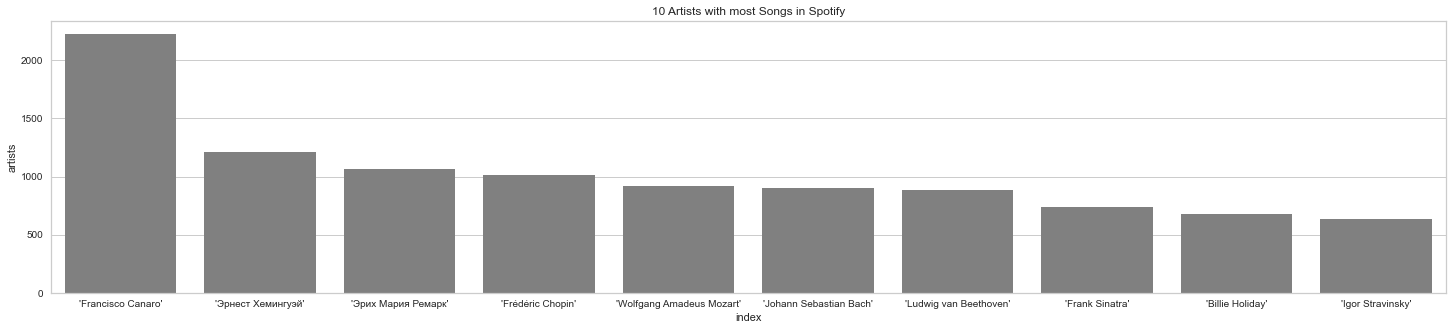

In [17]:
plt.figure(figsize=(25,5))
plt.title('10 Artists with most Songs in Spotify')
sns.barplot(data=df_artists[:10], x='index', y='artists', color='gray')

##### Danceability

In [18]:
df['danceability'].describe()

count    170653.000000
mean          0.537396
std           0.176138
min           0.000000
25%           0.415000
50%           0.548000
75%           0.668000
max           0.988000
Name: danceability, dtype: float64

<AxesSubplot:title={'center':'Danceability'}>

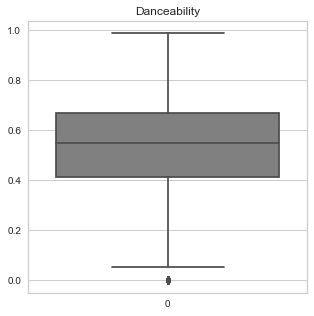

In [19]:
plt.figure(figsize=(5,5))
plt.title('Danceability')
sns.boxplot(data=df['danceability'], orient='v', color='gray')

<AxesSubplot:title={'center':'Danceability'}, xlabel='danceability', ylabel='Density'>

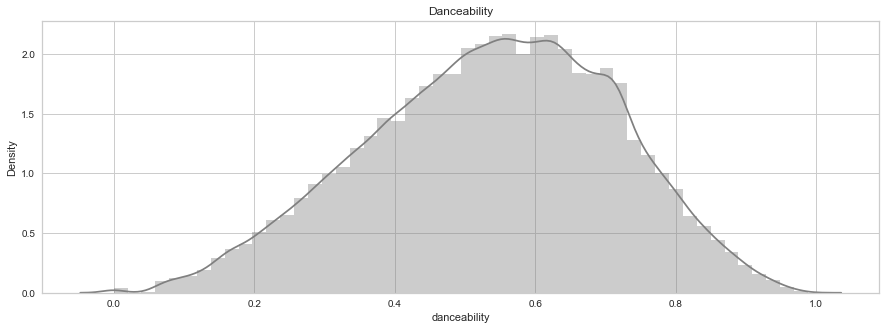

In [20]:
plt.figure(figsize=(15,5))
plt.title('Danceability')
sns.distplot(df['danceability'], color='gray')

In [21]:
def normal_test(feature, array, alpha=0.05):
    p = normaltest(array).pvalue
    if p < alpha:
        print(f'Rejeita H0. A feature {feature} NÃO está normalmente distribuída')
    else:
        print(f'Aceita H0. A feature {feature} está normalmente distribuída. P-valor = {p} >= {alpha}')

In [22]:
normal_test('danceability', df['danceability'].values)

Rejeita H0. A feature danceability NÃO está normalmente distribuída


##### Duration

In [23]:
df['duration_ms'].describe()

count    1.706530e+05
mean     2.309483e+05
std      1.261184e+05
min      5.108000e+03
25%      1.698270e+05
50%      2.074670e+05
75%      2.624000e+05
max      5.403500e+06
Name: duration_ms, dtype: float64

<AxesSubplot:title={'center':'Duration (miliseconds)'}>

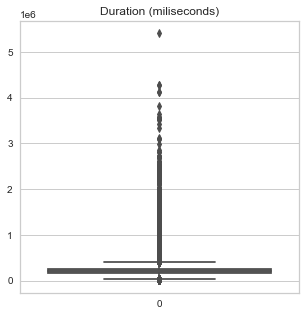

In [24]:
plt.figure(figsize=(5,5))
plt.title('Duration (miliseconds)')
sns.boxplot(data=df['duration_ms'], orient='v', color='gray')

<AxesSubplot:title={'center':'Duration (miliseconds)'}, xlabel='duration_ms', ylabel='Density'>

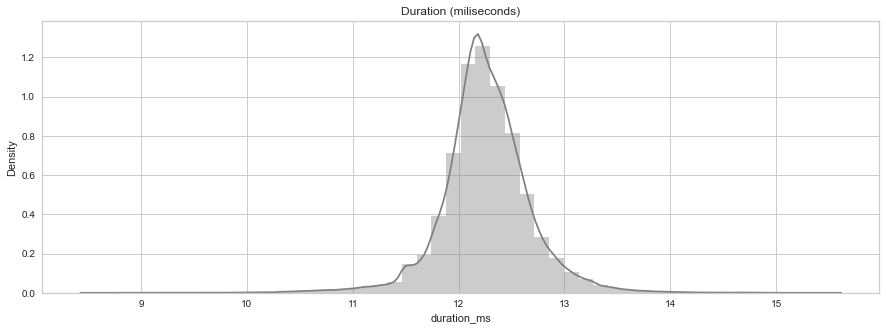

In [25]:
plt.figure(figsize=(15,5))
plt.title('Duration (miliseconds)')
sns.distplot(np.log(df['duration_ms']), color='gray')

In [26]:
normal_test('duration', df['duration_ms'].values)

Rejeita H0. A feature duration NÃO está normalmente distribuída


##### Energy

In [27]:
df['energy'].describe()

count    170653.000000
mean          0.482389
std           0.267646
min           0.000000
25%           0.255000
50%           0.471000
75%           0.703000
max           1.000000
Name: energy, dtype: float64

<AxesSubplot:title={'center':'Energy'}>

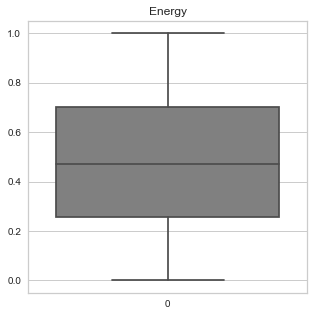

In [28]:
plt.figure(figsize=(5,5))
plt.title('Energy')
sns.boxplot(data=df['energy'], orient='v', color='gray')

<AxesSubplot:title={'center':'Energy'}, xlabel='energy', ylabel='Density'>

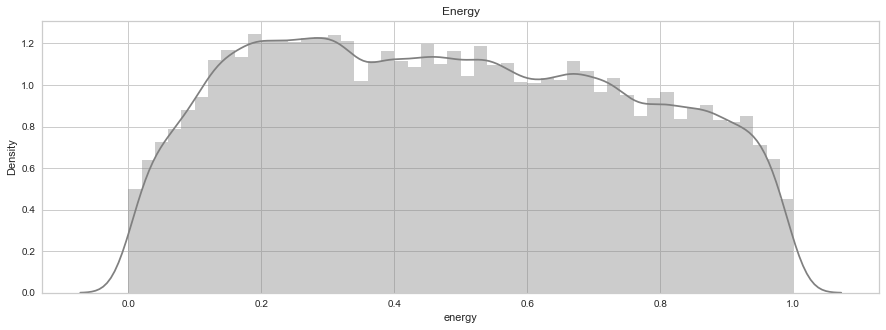

In [29]:
plt.figure(figsize=(15,5))
plt.title('Energy')
sns.distplot(df['energy'], color='gray')

##### Explicit

In [30]:
df['explicit'].value_counts()

0    156220
1     14433
Name: explicit, dtype: int64

<AxesSubplot:title={'center':'Musics with Explicit Content'}, xlabel='explicit', ylabel='count'>

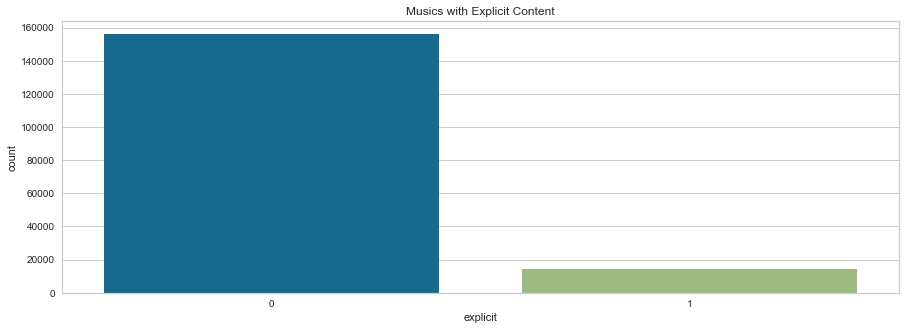

In [31]:
plt.figure(figsize=(15,5))
plt.title('Musics with Explicit Content')
sns.countplot(df['explicit'])

##### Instrumentalness

In [32]:
df['instrumentalness'].describe()

count    170653.000000
mean          0.167010
std           0.313475
min           0.000000
25%           0.000000
50%           0.000216
75%           0.102000
max           1.000000
Name: instrumentalness, dtype: float64

<AxesSubplot:title={'center':'Instrumentalness'}, xlabel='instrumentalness', ylabel='Density'>

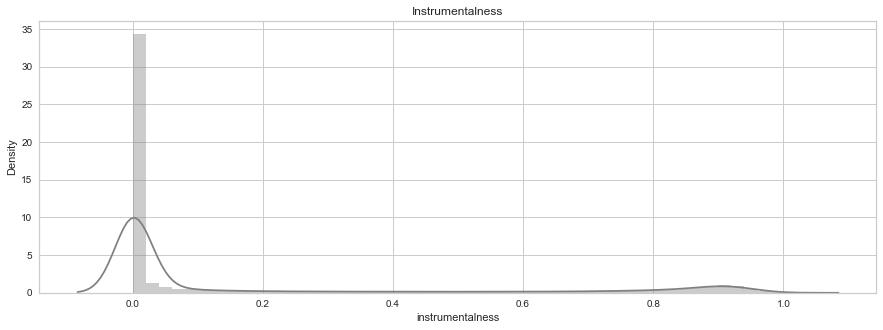

In [33]:
plt.figure(figsize=(15,5))
plt.title('Instrumentalness')
sns.distplot(df['instrumentalness'], color='gray')

##### Key

In [34]:
df['key'].describe()

count    170653.000000
mean          5.199844
std           3.515094
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          11.000000
Name: key, dtype: float64

<AxesSubplot:title={'center':'Key'}, xlabel='key', ylabel='count'>

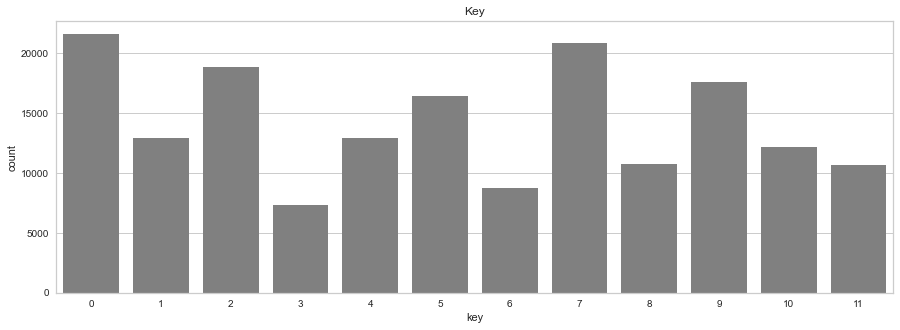

In [35]:
plt.figure(figsize=(15,5))
plt.title('Key')
sns.countplot(df['key'], color='gray')

##### Liveness

In [36]:
df['liveness'].describe()

count    170653.000000
mean          0.205839
std           0.174805
min           0.000000
25%           0.098800
50%           0.136000
75%           0.261000
max           1.000000
Name: liveness, dtype: float64

<AxesSubplot:title={'center':'Liveness'}>

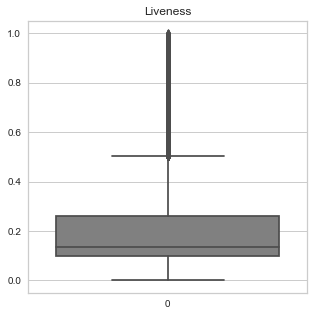

In [37]:
plt.figure(figsize=(5,5))
plt.title('Liveness')
sns.boxplot(data=df['liveness'], orient='v', color='gray')

<AxesSubplot:title={'center':'Liveness'}, xlabel='liveness', ylabel='Density'>

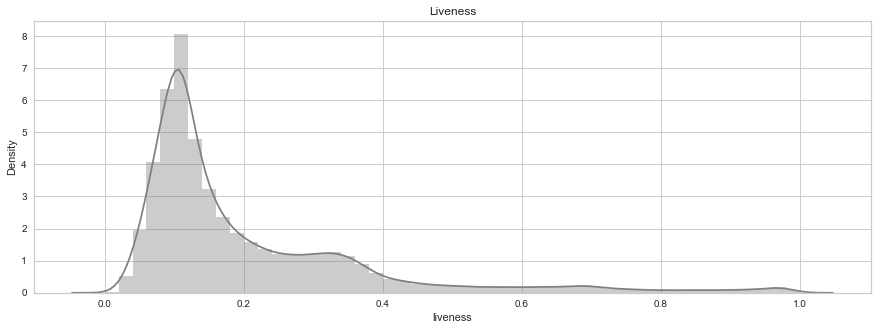

In [38]:
plt.figure(figsize=(15,5))
plt.title('Liveness')
sns.distplot(df['liveness'], color='gray')

##### Loudness

In [39]:
df['loudness'].describe()

count    170653.000000
mean        -11.467990
std           5.697943
min         -60.000000
25%         -14.615000
50%         -10.580000
75%          -7.183000
max           3.855000
Name: loudness, dtype: float64

<AxesSubplot:title={'center':'Loudeness'}>

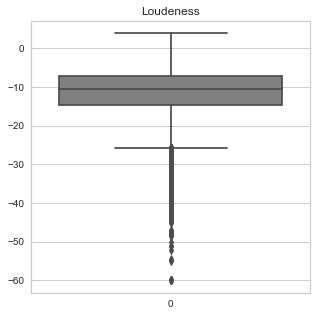

In [40]:
plt.figure(figsize=(5,5))
plt.title('Loudeness')
sns.boxplot(data=df['loudness'], orient='v', color='gray')

<AxesSubplot:title={'center':'Loudness'}, xlabel='loudness', ylabel='Density'>

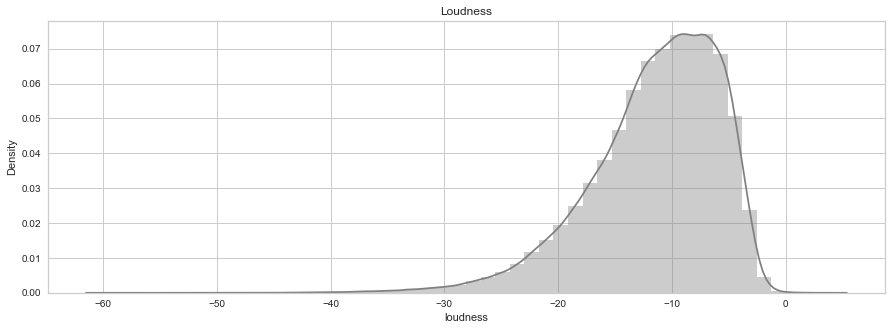

In [41]:
plt.figure(figsize=(15,5))
plt.title('Loudness')
sns.distplot(df['loudness'], color='gray')

In [42]:
normal_test('loudness', df['loudness'].values)

Rejeita H0. A feature loudness NÃO está normalmente distribuída


##### Mode

In [43]:
df['mode'].value_counts()

1    120635
0     50018
Name: mode, dtype: int64

<AxesSubplot:xlabel='mode', ylabel='count'>

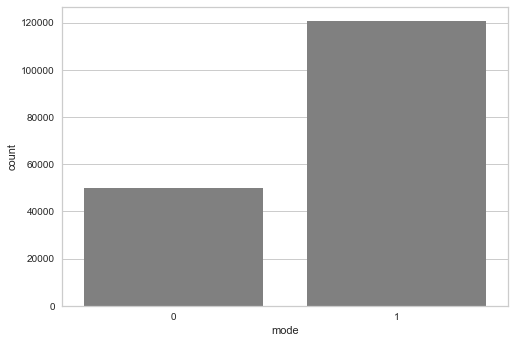

In [44]:
sns.countplot(df['mode'], color='gray')

##### Popularity

In [45]:
df['popularity'].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

<AxesSubplot:title={'center':'Popularity'}>

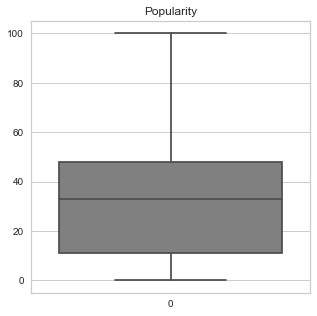

In [46]:
plt.figure(figsize=(5,5))
plt.title('Popularity')
sns.boxplot(data=df['popularity'], orient='v', color='gray')

<AxesSubplot:title={'center':'Popularity'}, xlabel='popularity', ylabel='Density'>

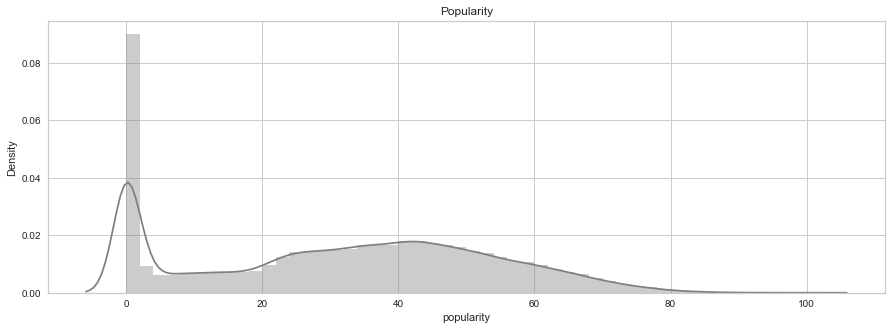

In [47]:
plt.figure(figsize=(15,5))
plt.title('Popularity')
sns.distplot(df['popularity'], color='gray')

##### Speechiness

In [48]:
df['speechiness'].describe()

count    170653.000000
mean          0.098393
std           0.162740
min           0.000000
25%           0.034900
50%           0.045000
75%           0.075600
max           0.970000
Name: speechiness, dtype: float64

<AxesSubplot:title={'center':'Speechiness'}>

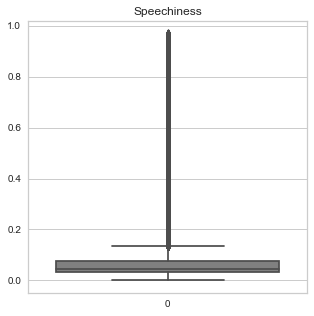

In [49]:
plt.figure(figsize=(5,5))
plt.title('Speechiness')
sns.boxplot(data=df['speechiness'], orient='v', color='gray')

<AxesSubplot:title={'center':'Speechiness'}, xlabel='speechiness', ylabel='Density'>

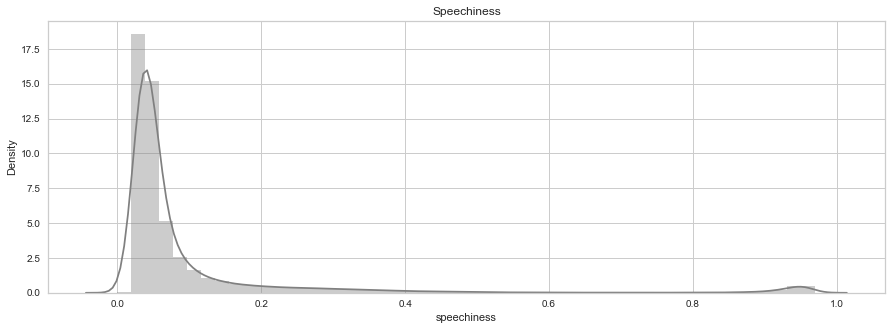

In [50]:
plt.figure(figsize=(15,5))
plt.title('Speechiness')
sns.distplot(df['speechiness'], color='gray')

##### Tempo

In [51]:
df['tempo'].describe()

count    170653.000000
mean        116.861590
std          30.708533
min           0.000000
25%          93.421000
50%         114.729000
75%         135.537000
max         243.507000
Name: tempo, dtype: float64

<AxesSubplot:title={'center':'Tempo'}>

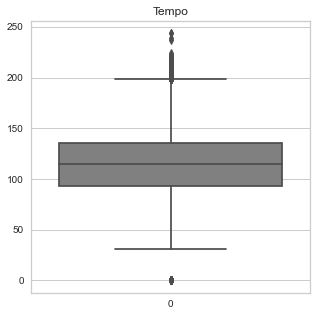

In [52]:
plt.figure(figsize=(5,5))
plt.title('Tempo')
sns.boxplot(data=df['tempo'], orient='v', color='gray')

<AxesSubplot:title={'center':'Tempo'}, xlabel='tempo', ylabel='Density'>

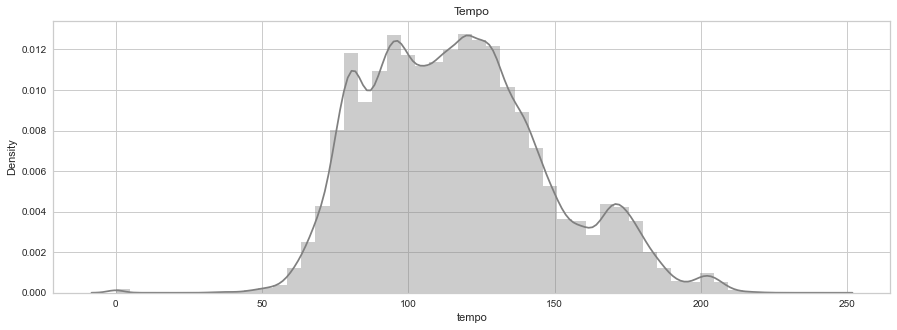

In [53]:
plt.figure(figsize=(15,5))
plt.title('Tempo')
sns.distplot(df['tempo'], color='gray')

In [54]:
normal_test('tempo', df['tempo'].values)

Rejeita H0. A feature tempo NÃO está normalmente distribuída


# Modelo

In [55]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [56]:
X = df.drop(['artists', 'id', 'name', 'release_date'], axis=1)

### K-Means

##### Elbow

1 2714366249908513.0
2 1519318663307858.2
3 935815474209217.0
4 595019862333375.5
5 409816974274742.4
6 302222364479400.1
7 230280527558464.2
8 184014278884717.12
9 151899628098533.4
10 129203801520797.56
11 99228287302210.0
12 84474324555737.12
13 73518410544057.0
14 62577265022060.22
15 56051659777612.7
16 49683087704998.6
17 45601548095610.53
18 38345678890588.33
19 35443712813433.586
20 32585320139697.98
21 29770652527848.18
22 28035500173508.23
23 26120519328536.863
24 25358335685312.36
25 23705694720998.258
26 22949980908121.637
27 22077271186532.61
28 21309016853294.293
29 20889435582684.902
30 20409135255140.805


Text(0, 0.5, 'WCSS')

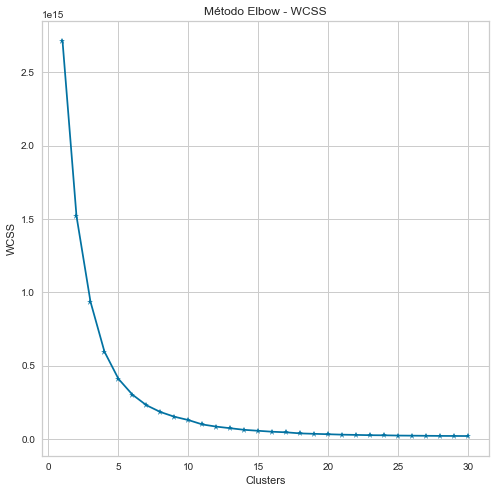

In [57]:
plt.figure(figsize=(8,8))

wcss = []

for i in range(1,31):
    kmeans = KMeans(n_clusters=i, init='random')
    kmeans.fit(X)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,31), wcss, '*-')
plt.title('Método Elbow - WCSS')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

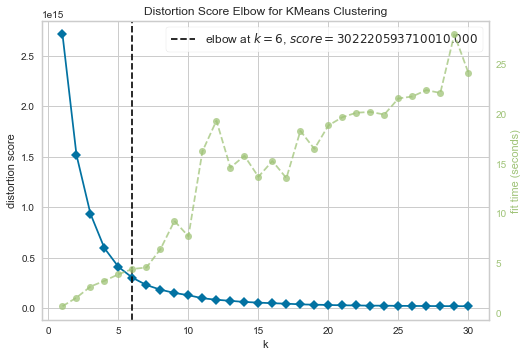

In [58]:
vis = KElbowVisualizer(kmeans, k=(1,31))
vis.fit(X)
vis.show();

##### Davies-Bouldin

2 0.49781297990370005
3 0.5002624787505056
4 0.5007952065951462
5 0.497800523093418
6 0.49787603482337567
7 0.4977792972702136
8 0.5009029289542274
9 0.497835637214034
10 0.49886098756378555
11 0.5017815793118922
12 0.49779153025200235
13 0.49787427808372897
14 0.4978339904926241
15 0.4981329402657137
16 0.5006070095690596
17 0.5001351679236181
18 0.500308077853185
19 0.499311067721913
20 0.498044246160922
21 0.4978139160858267
22 0.4988038259086132
23 0.4954223630747329
24 0.4997000112231721
25 0.5022302638341019
26 0.49818294652078815
27 0.5000400026391018
28 0.500167137401473
29 0.5000269759909337
30 0.49885772652565924


Text(0, 0.5, 'Score')

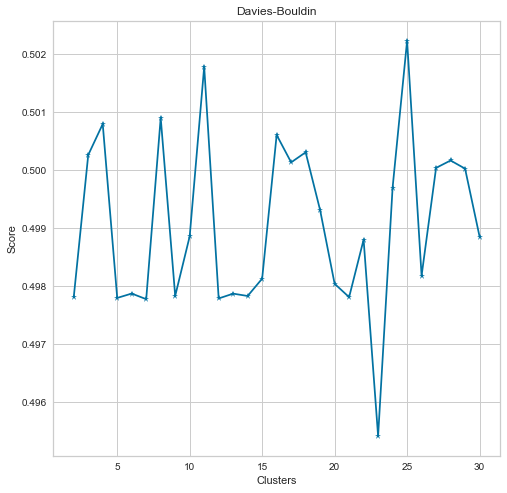

In [59]:
plt.figure(figsize=(8,8))

scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=i, init='random')
    cluster_found = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, cluster_found)
    scores.append(score)
    print(n_cluster, score)

plt.plot(range(2,31), scores, '*-')
plt.title('Davies-Bouldin')
plt.xlabel('Clusters')
plt.ylabel('Score')

##### Modelo

In [60]:
k = 15

In [61]:
kmeans = KMeans(n_clusters=k)

In [62]:
cluster_found = kmeans.fit_predict(X)
silhouette = silhouette_score(X, cluster_found)
davies_bouldin = davies_bouldin_score(X, cluster_found)

In [63]:
print(f'''
      Resultados da Clusterização utilizando o K-Means:
      Silhouette: {round(silhouette,2)}
      Davies-Bouldin: {round(davies_bouldin,2)}
      ''')


      Resultados da Clusterização utilizando o K-Means:
      Silhouette: 0.52
      Davies-Bouldin: 0.5
      


# Avaliação de Clusters

In [64]:
df['cluster'] = cluster_found

In [65]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Ber...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,7
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,9
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0
